In [1]:
from transformers import ViltForQuestionAnswering 
from transformers import ViltProcessor
from PIL import Image 
import requests
import torch

/Users/bulatsaripov/Desktop/Courses [Inno]/Intro To Computer Vision/Project/github_repo/Visual_Question_Answering_for_Charts/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
text = "How many cats are there?"

In [3]:

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
encoding = processor(image, text, return_tensors="pt")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
outputs = model(**encoding)
predictions = outputs.logits.argmax(-1).item()
print(f"Predicted answer: {model.config.id2label[predictions]}")

Predicted answer: 2


In [6]:
from datasets import load_dataset

# ds = load_dataset("HuggingFaceM4/ChartQA")

In [8]:
validation_ds = load_dataset("HuggingFaceM4/ChartQA", split="val")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


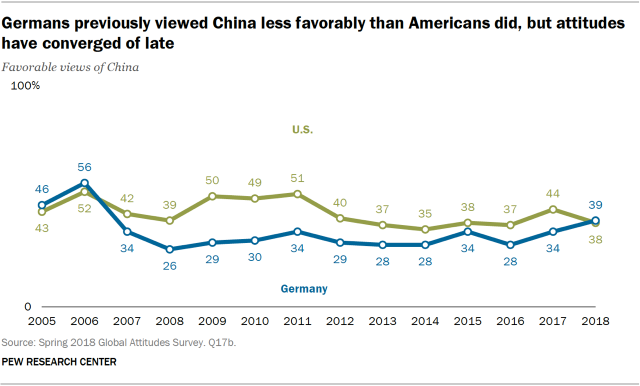

In [9]:
validation_ds[0]['image']

In [10]:
validation_ds[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x386>,
 'query': "What's the color of graph with 56 as the highest value?",
 'label': ['Blue'],
 'human_or_machine': 0}

In [31]:
next(iter(validation_ds))['label']

['Blue']

In [36]:
validation_ds

Dataset({
    features: ['image', 'query', 'label', 'human_or_machine'],
    num_rows: 1920
})

In [44]:
def evaluate_model(
  model_path,
  eval_ds
):
    model = ViltForQuestionAnswering.from_pretrained(model_path)
    processor = ViltProcessor.from_pretrained(model_path)
    
    correct = 0
    total = 0
    
    for i, example in enumerate(eval_ds):
      if i > 4:
        break
      image = example['image'] 
      query = example['query']
      label = example['label']
      encoding = processor(image, query, return_tensors="pt")
      
      outputs = model(**encoding)
      predictions = outputs.logits.argmax(-1).item()
      print(f"Predicted answer: {model.config.id2label[predictions]}, correct answer: {label}")
      if correct == label:
        correct += 1
      total += 1
    print(f"Accuracy: {correct/total}")
    

In [45]:
model_path = "dandelin/vilt-b32-finetuned-vqa"



In [46]:
evaluate_model(model_path, validation_ds)

Predicted answer: yellow, correct answer: ['Blue']
Predicted answer: 2012, correct answer: ['2018']
Predicted answer: train, correct answer: ['Not too much/not at all']
Predicted answer: 5, correct answer: ['0.72']
Predicted answer: 50, correct answer: ['68']
Accuracy: 0.0
